In [7]:
from os import listdir, path
from pyteomics import fasta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# Конвертация файлов

In [5]:
hw_dir = '/projects/mipt_dbmp_biotechnology/proteomics/hw/'
all_files = listdir(hw_dir)
selected_samples = [f for f in all_files if f.endswith('.raw') and ('6138' in f or '4114' in f)]

for sample in sorted(selected_samples):
    print(sample)

LUM2_00790_VG_6138K_1.raw
LUM2_00791_VG_6138K_2.raw
LUM2_00792_VG_6138K_3.raw
LUM2_00793_VG_6138K_4.raw
LUM2_00798_VG_6138B_1.raw
LUM2_00799_VG_6138B_2.raw
LUM2_00800_VG_6138B_3.raw
LUM2_00801_VG_6138B_4.raw
LUM2_00806_VG_6138A_1.raw
LUM2_00807_VG_6138A_2.raw
LUM2_00808_VG_6138A_3.raw
LUM2_00809_VG_6138A_4.raw
LUM2_00817_VG_4114B_1.raw
LUM2_00818_VG_4114B_2.raw
LUM2_00819_VG_4114B_3.raw
LUM2_00820_VG_4114B_4.raw
LUM2_00821_VG_4114B_5.raw
LUM2_00822_VG_4114B_6.raw
LUM2_00823_VG_4114B_7.raw
LUM2_00835_VG_4114K_1.raw
LUM2_00836_VG_4114K_2.raw
LUM2_00837_VG_4114K_3.raw
LUM2_00838_VG_4114K_4.raw
LUM2_00839_VG_4114K_5.raw
LUM2_00840_VG_4114K_6.raw
LUM2_00841_VG_4114K_7.raw
LUM2_00853_VG_4114A_1.raw
LUM2_00854_VG_4114A_2.raw
LUM2_00855_VG_4114A_3.raw
LUM2_00856_VG_4114A_4.raw
LUM2_00857_VG_4114A_5.raw
LUM2_00858_VG_4114A_6.raw
LUM2_00859_VG_4114A_7.raw


In [10]:
%%time
fastafile = '/projects/mipt_dbmp_biotechnology/proteomics/sp_human_canonical_2023-09-06_shuffled.fasta'
filedir = '/projects/mipt_dbmp_biotechnology/proteomics/hw/'
outdir = '/home/aandreeva/hw/hw_17/mzML/'

for file in selected_samples:
    if file.endswith('.raw') and file.replace('raw', 'mzML') not in listdir(outdir):
        path_to_file = path.join(filedir, file)
        print(f"Обрабатывается: {file}")
        !/projects/mipt_dbmp_biotechnology/soft/ThermoRawFileParser/ThermoRawFileParser -i $path_to_file -o $outdir

Обрабатывается: LUM2_00800_VG_6138B_3.raw
=2025-11-14 13:20:04 INFO Started parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00800_VG_6138B_3.raw
2025-11-14 13:20:15 INFO Processing 84484 MS scans
10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 

2025-11-14 13:22:38 INFO Finished parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00800_VG_6138B_3.raw
2025-11-14 13:22:38 INFO Processing completed 0 errors, 0 warnings
Обрабатывается: LUM2_00806_VG_6138A_1.raw
=2025-11-14 13:22:38 INFO Started parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00806_VG_6138A_1.raw
2025-11-14 13:22:47 INFO Processing 87115 MS scans
10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 

2025-11-14 13:25:09 INFO Finished parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00806_VG_6138A_1.raw
2025-11-14 13:25:09 INFO Processing completed 0 errors, 0 warnings
Обрабатывается: LUM2_00817_VG_4114B_1.raw
=2025-11-14 13:25:10 INFO Started parsing /projects/mipt_dbmp_biotechnology/proteomic

In [12]:
%%time
filedir = '/home/aandreeva/hw/hw_17/fragger_scavager'
outdir = '/home/aandreeva/hw/hw_17/fragger_scavager'
for file in listdir(filedir):
    filename = file.split('.')[0] 
    if file.endswith('.pepXML') and filename + '_protein_groups.tsv' not in listdir(outdir):
        print(file)
        path_to_pepxml = path.join(filedir, file)
        !scavager -p DECOY_ -db $fastafile -o $outdir $path_to_pepxml

LUM2_00840_VG_4114K_6.pepXML
     INFO: [16:02:07] 1 file(s) to process.
     INFO: [16:02:07] Loading file LUM2_00840_VG_4114K_6.pepXML...
     INFO: [16:02:18] Default target-decoy filtering, 1% PSM FDR: Number of target PSMs = 29466
     INFO: [16:02:18] Calibrating retention model...
     INFO: [16:02:37] RT model training results: R^2 = 0.853956 , std = 10.784510
     INFO: [16:02:37] Retention model calibrated successfully.
     INFO: [16:02:37] Starting machine learning...
     INFO: [16:03:57] Machine learning is finished.
     INFO: [16:04:02] Final results at 1.0% FDR level:
     INFO: [16:04:02] Identified PSMs: 30725
     INFO: [16:04:02] Identified peptides: 22308
     INFO: [16:04:02] Identified proteins: 3986
     INFO: [16:04:02] Identified protein groups: 3486
     INFO: [16:04:02] Processing finished.
     INFO: [16:04:07] Output tables saved.
     INFO: [16:04:17] Figures saved.
LUM2_00818_VG_4114B_2.pepXML
     INFO: [16:04:19] 1 file(s) to process.
     INFO: [16:0

In [13]:
i = 0
for p in fasta.read(fastafile):
    i+=1
print("Число настоящих белков в базе данных:",  i//2)

Число настоящих белков в базе данных: 20423


In [34]:
sample_df = pd.DataFrame(columns = ['File Name', 'SampleID'])
filedir = '/home/aandreeva/hw/hw_17/fragger_scavager/'
for file in listdir(filedir):
    if file.endswith('protein_groups.tsv'):
        name = file.split('_protein_groups')[0]
        sample = file.split('VG_')[1].split('_')[0]
        tmp_dict = {'File Name': [file],
                    'SampleID':[sample]}
        sample_df = pd.concat([sample_df, pd.DataFrame.from_dict(tmp_dict)])
sample_df.to_csv('/home/aandreeva/hw/hw_17/fragger_scavager/sample_file.csv')

In [39]:
my_df = pd.read_csv('/home/aandreeva/hw/hw_17/fragger_scavager/sample_file.csv', index_col=0)
sem_df = pd.read_csv('/projects/mipt_dbmp_biotechnology/proteomics/sample_file.csv', index_col=0)
combined_df.to_csv('/home/aandreeva/hw/hw_17/fragger_scavager/sample_file_combined.csv', index=False)
combined_df.head()

File Name SampleID
0  LUM2_00791_VG_6138K_2_protein_groups.tsv    6138K
1  LUM2_00820_VG_4114B_4_protein_groups.tsv    4114B
2  LUM2_00806_VG_6138A_1_protein_groups.tsv    6138A
3  LUM2_00854_VG_4114A_2_protein_groups.tsv    4114A
4  LUM2_00857_VG_4114A_5_protein_groups.tsv    4114A

In [46]:
filedir = '/home/aandreeva/hw/hw_17/clean_fragger'
sample_file = '/home/aandreeva/hw/hw_17/fragger_scavager/sample_file_combined.csv'
outdir = '/home/aandreeva/hw/hw_17/qreps'

labels = '3821A,3821K 3821B,3821K 4114A,4114K 4114B,4114K 6138A,6138K 6138B,6138K'

!qreps --sample-file $sample_file --labels $labels\
    --input-dir $filedir --output-dir $outdir\
    --imputation kNN --thresholds semi-dynamic --alpha 0.01 --regulation UP\
    --fasta-size 20423 --species 9606 --report True

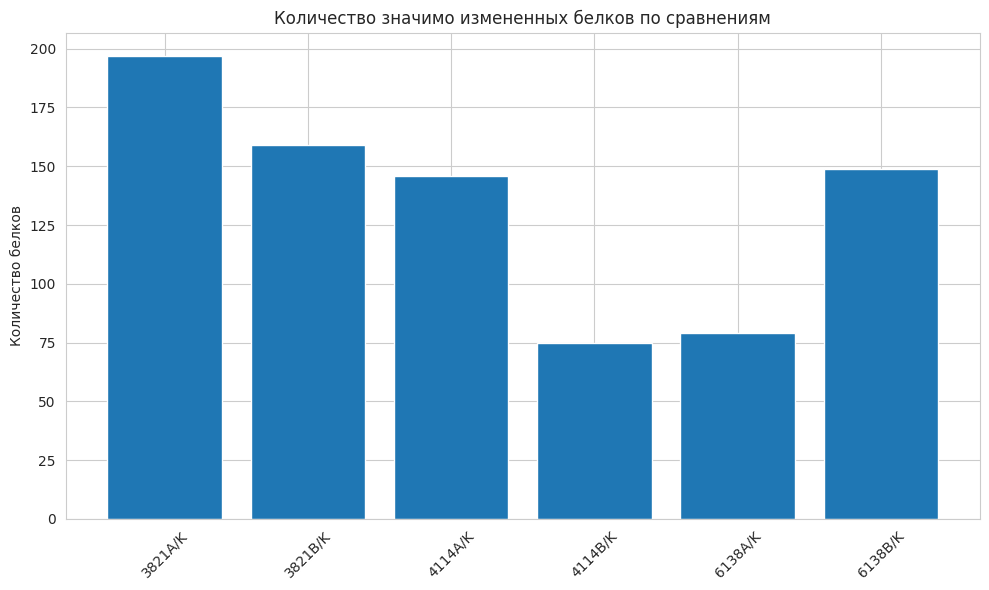

In [47]:
comparisons = ['3821A/K', '3821B/K', '4114A/K', '4114B/K', '6138A/K', '6138B/K']
significant_proteins = [197, 159, 146, 75, 79, 149] # из данных в папке qreps

plt.figure(figsize=(10, 6))
plt.bar(comparisons, significant_proteins)
plt.title('Количество значимо измененных белков по сравнениям')
plt.ylabel('Количество белков')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

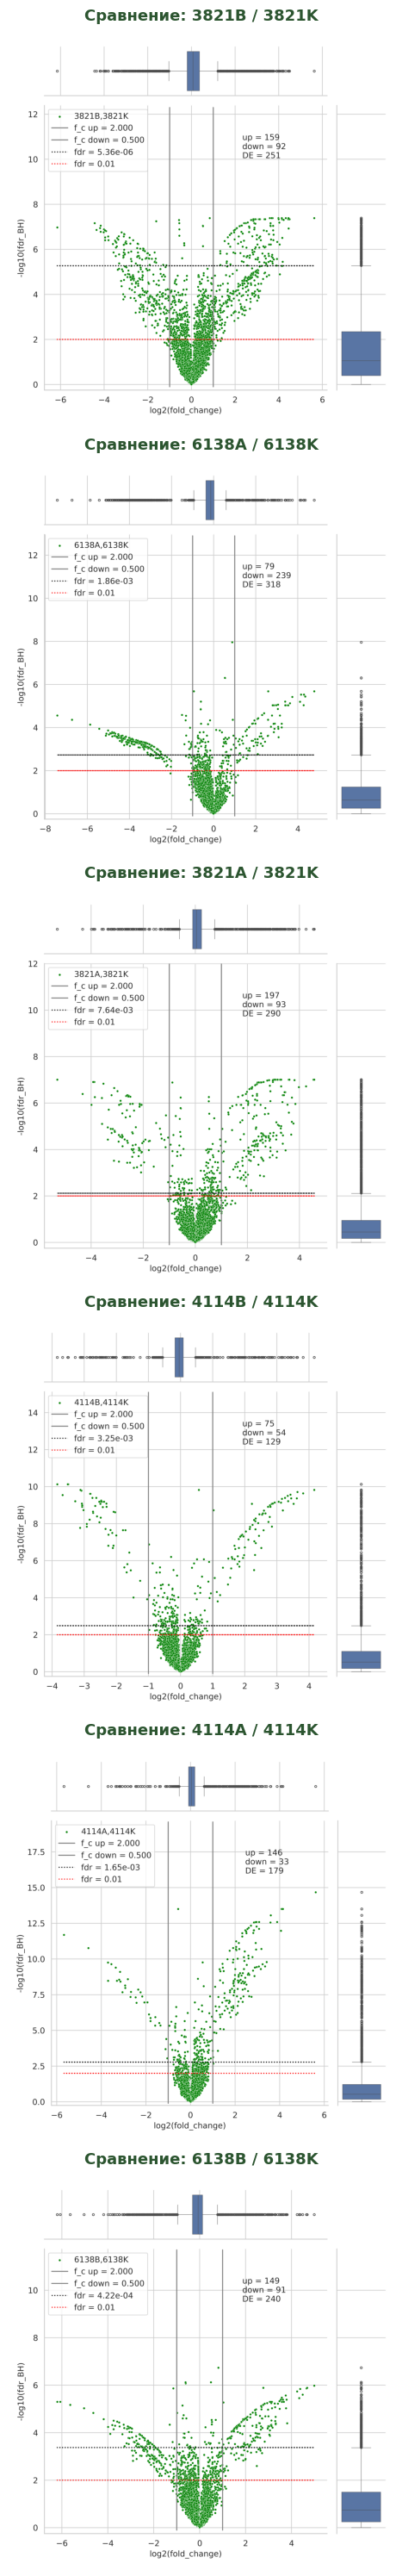

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os

output_path = '/home/aandreeva/hw/hw_17/qreps'
volcano_images = [img for img in os.listdir(output_path) 
                 if img.startswith('volcano_') and img.endswith('.png')]

n_plots = len(volcano_images)
fig, axes = plt.subplots(n_plots, 1, figsize=(14, 5*n_plots))

for idx, img_name in enumerate(volcano_images):
    if n_plots == 1:
        ax = axes
    else:
        ax = axes[idx]
    img_data = mpimg.imread(os.path.join(output_path, img_name))
    ax.set_facecolor(bg_colors[idx % len(bg_colors)])
    ax.imshow(img_data)
    plot_title = (img_name.replace('volcano_', '')
                          .replace('.png', '')
                          .replace('_', ' / ')
                          .upper())
    
    ax.set_title(f'Сравнение: {plot_title}', 
                fontsize=13, 
                fontweight='semibold',
                color='#2C5530',
                pad=15)
    
    ax.axis('off')
    for spine in ax.spines.values():
        spine.set_color('#D4A574')
        spine.set_linewidth(2)

plt.tight_layout()
plt.show()

# Enrichment analysis

Графики с семинара:

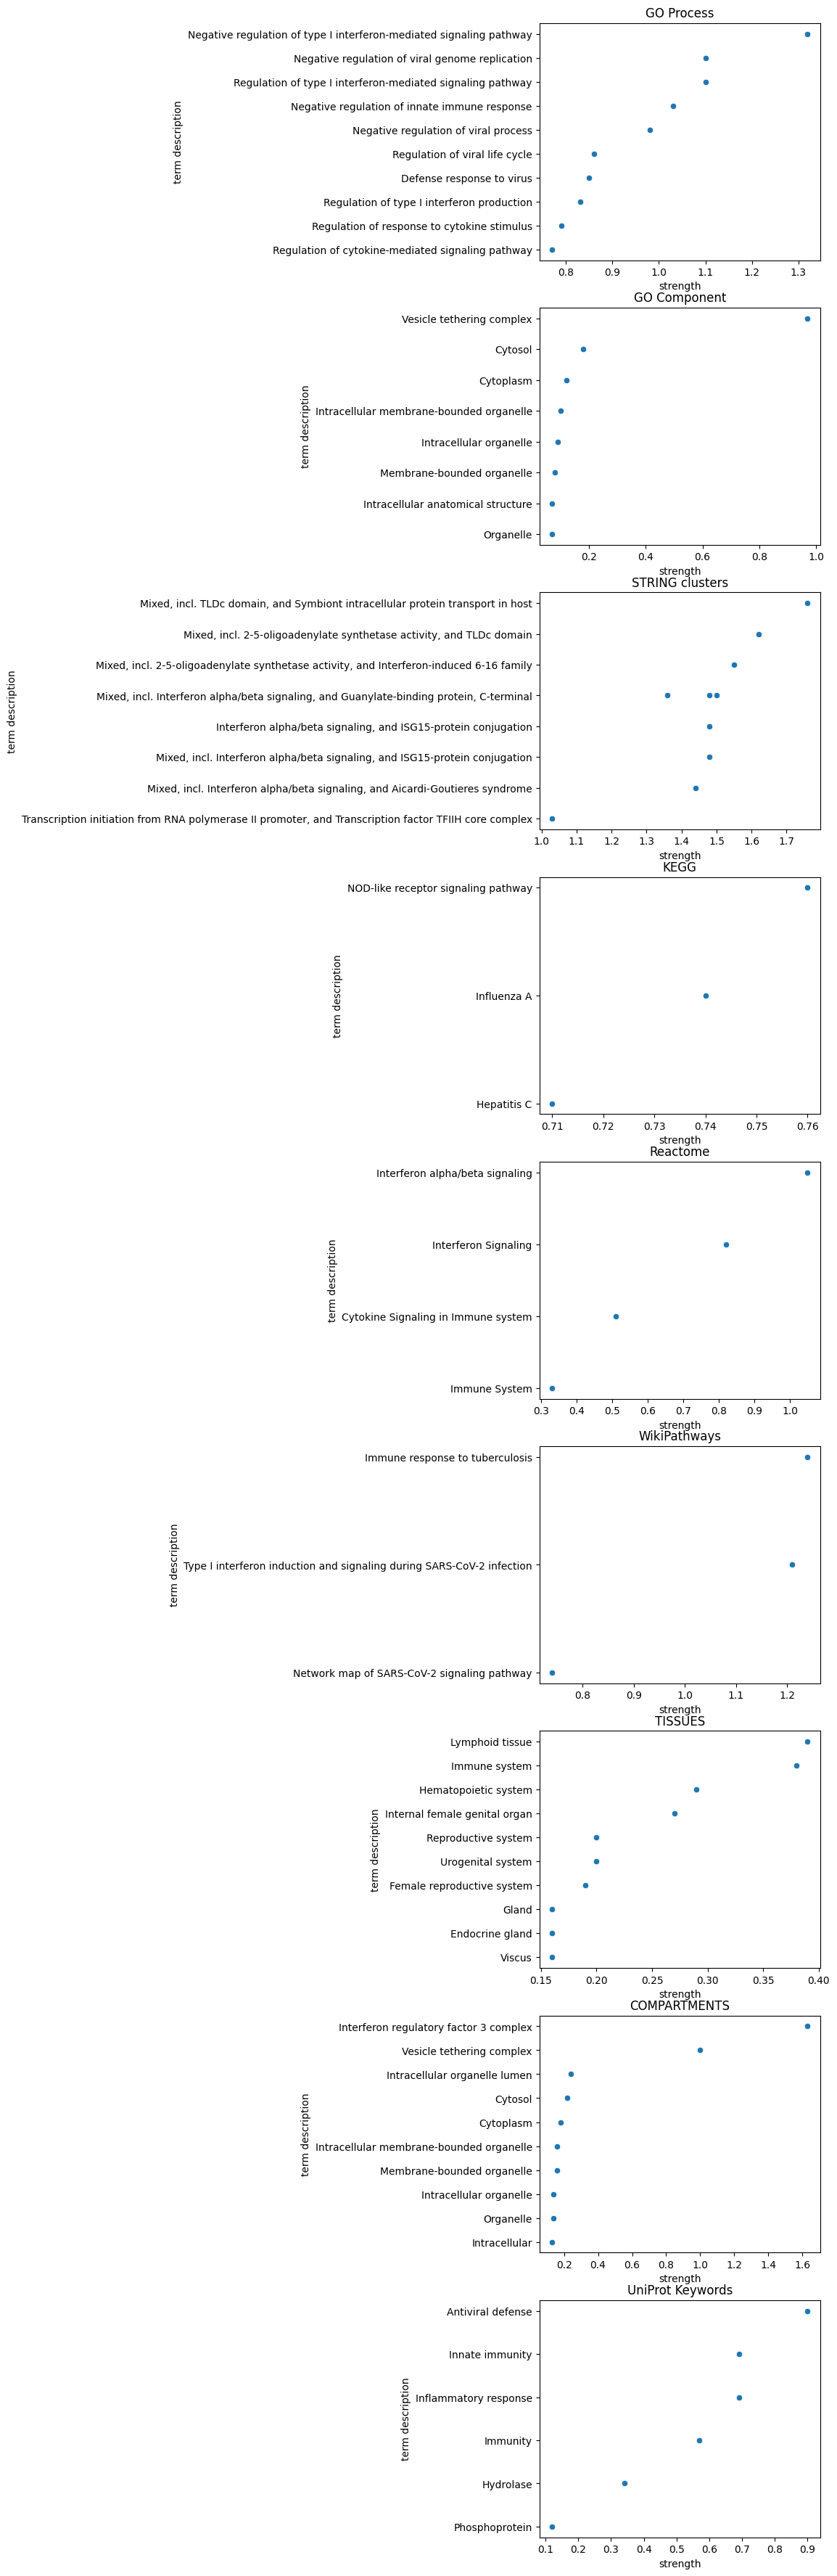

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir, path
import numpy as np
filedir = '/projects/mipt_dbmp_biotechnology/proteomics/qreps'
for file in listdir(filedir):
    if file.startswith('enrichment'):
        df = pd.read_csv(path.join(filedir, file), sep = '\t')
        cats = df['#category'].unique()
        f, ax = plt.subplots(len(cats), 1, figsize = (5, 45))
        i = 0
        for c in cats:
            tmp = df[df['#category'] == c]
            tmp = tmp.sort_values(by = 'strength', ascending = False)
            sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
            ax[i].set_title(c)
            i+=1

# Генные сети

3821A_3821K

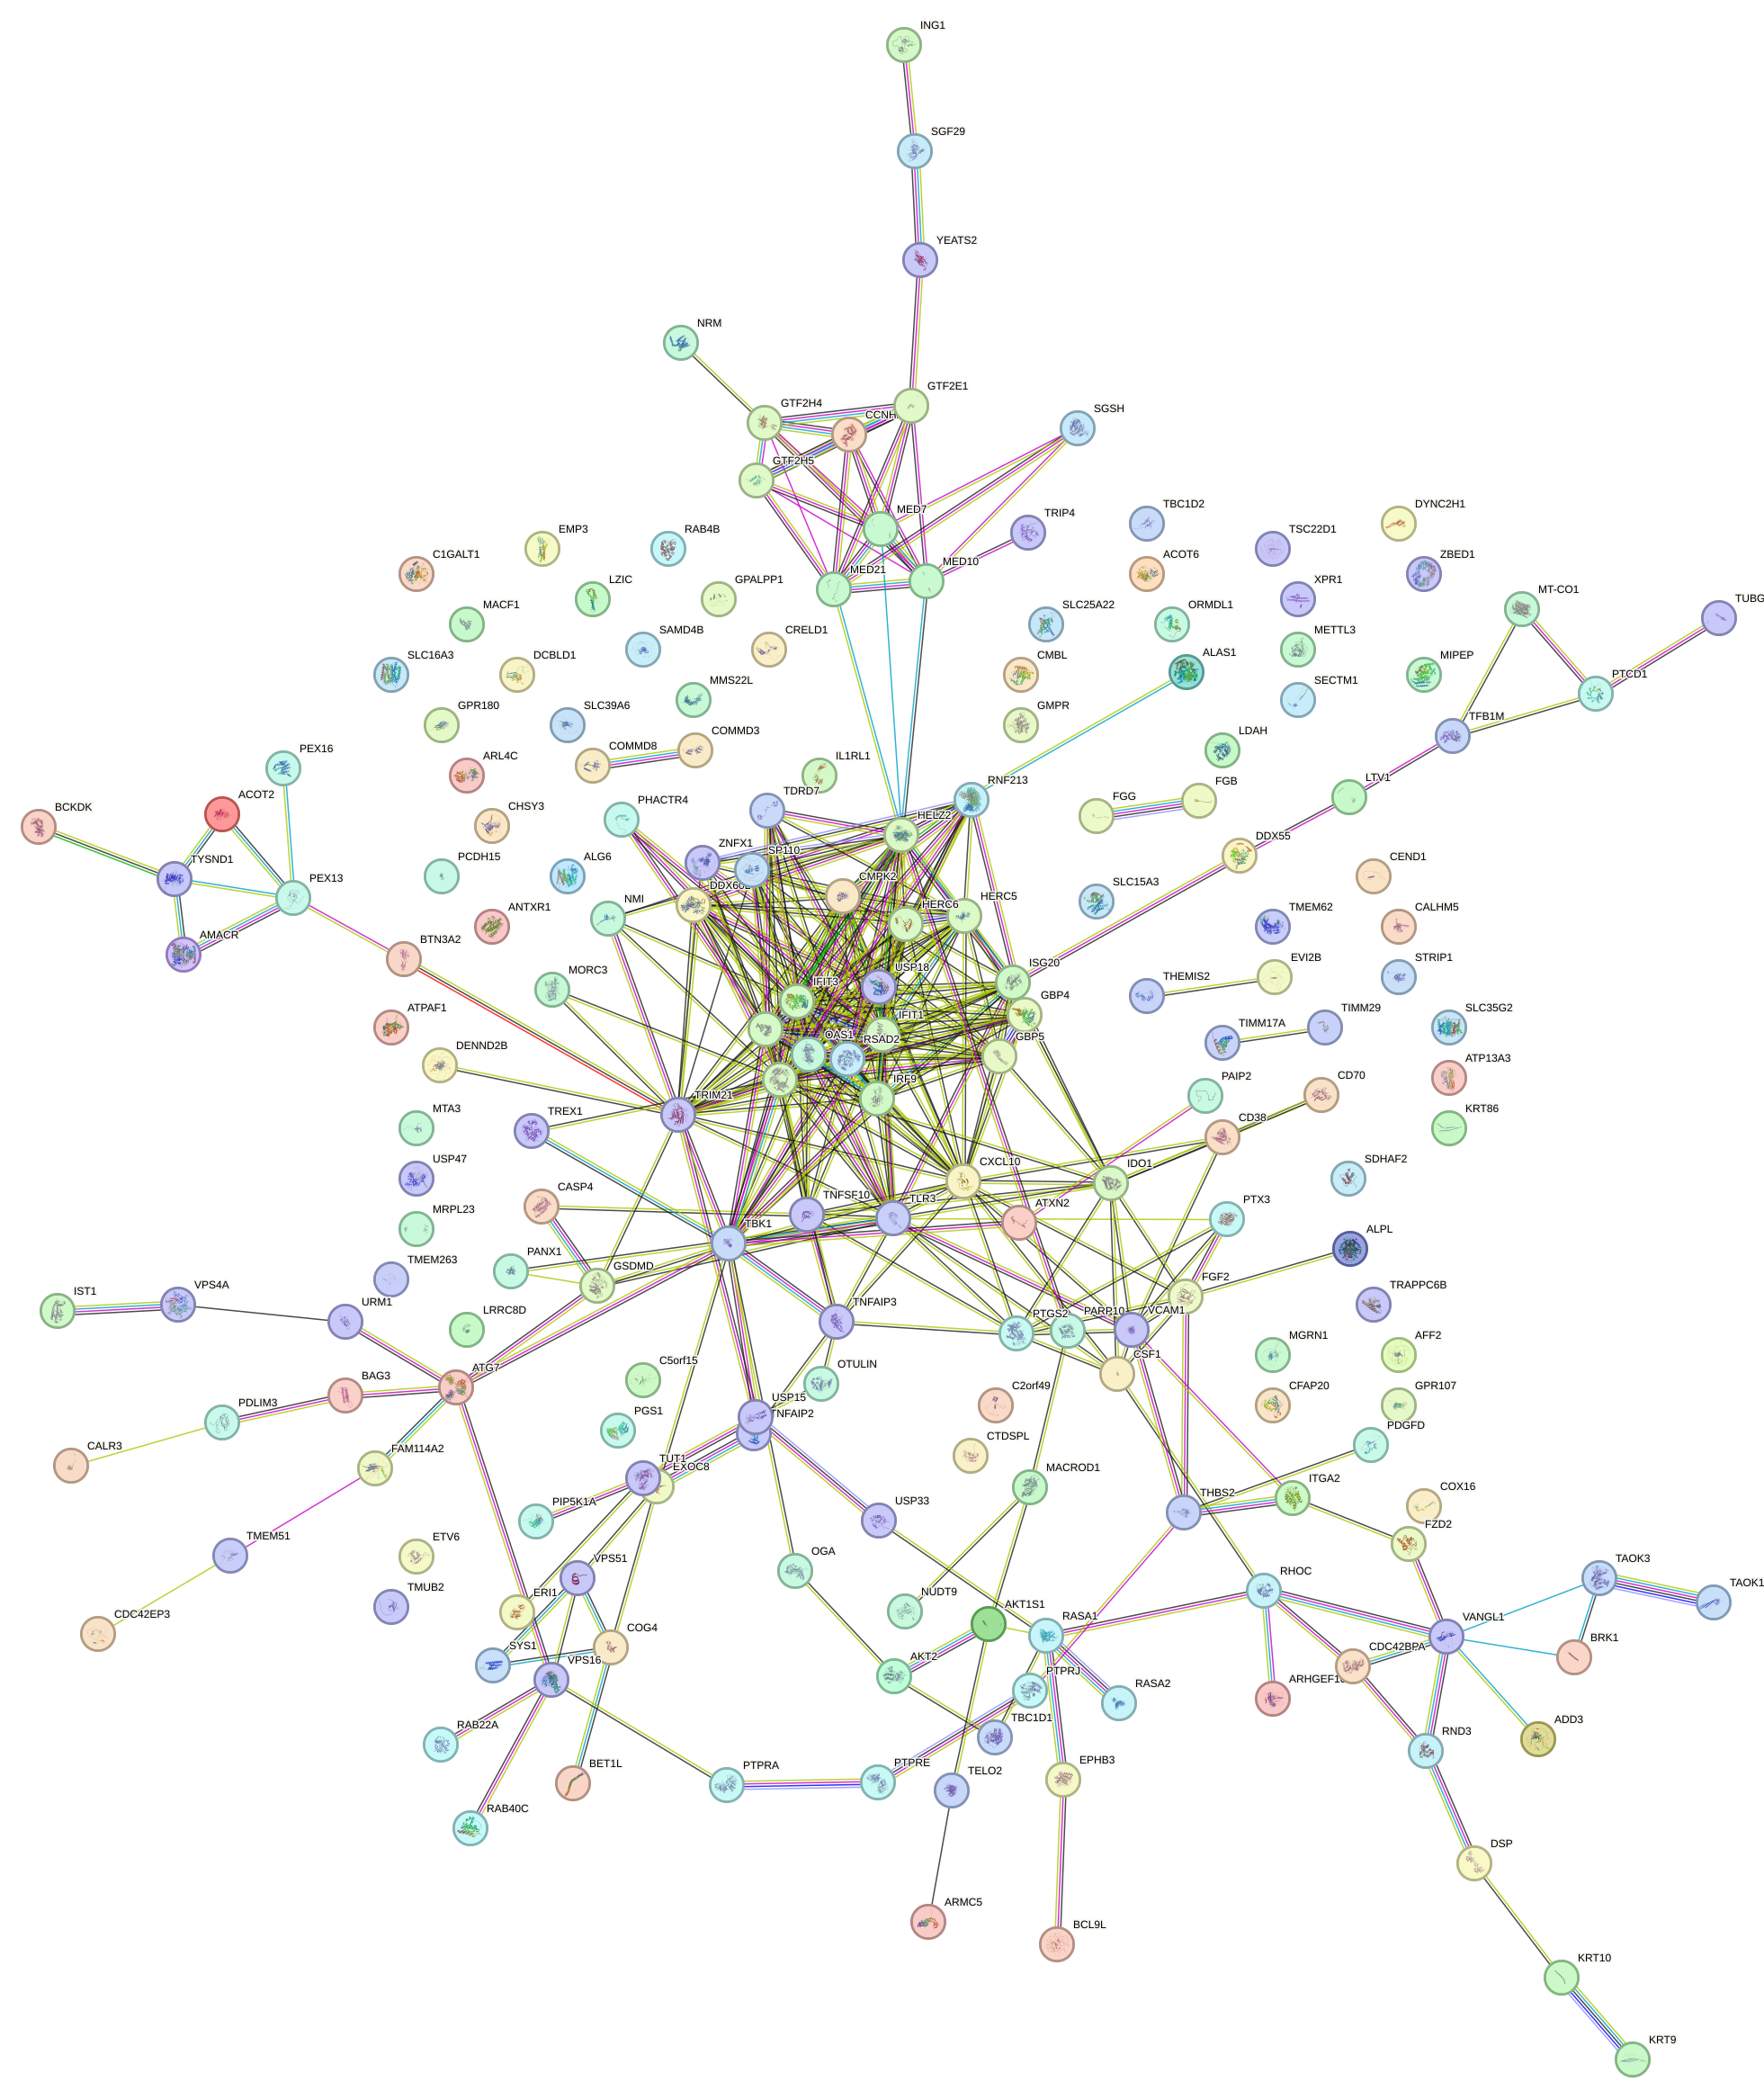

3821_AK

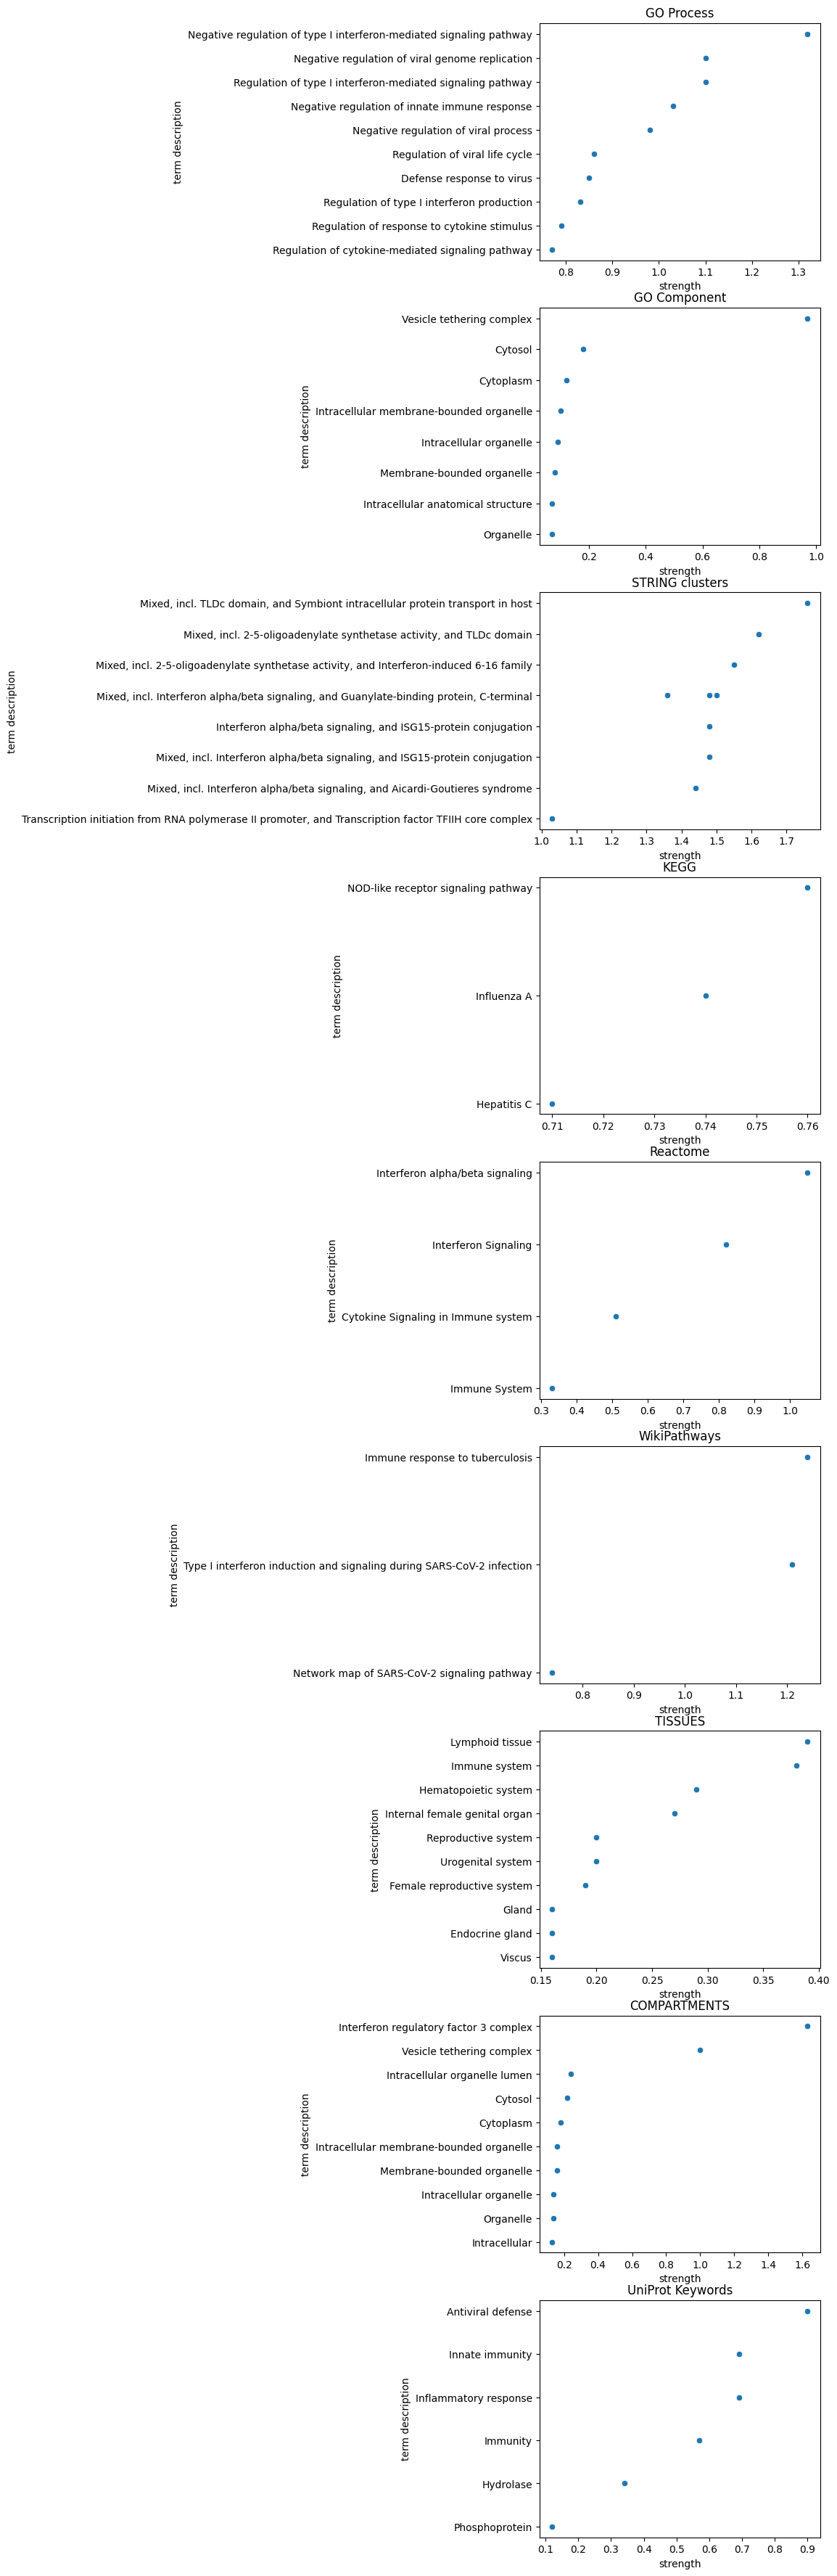

In [7]:
df = pd.read_csv('/home/aandreeva/hw/hw_17/enrichment.all_3821AK.tsv', sep = '\t')
cats = df['#category'].unique()
f, ax = plt.subplots(len(cats), 1, figsize = (5, 45))
i = 0
for c in cats:
    tmp = df[df['#category'] == c]
    tmp = tmp.sort_values(by = 'strength', ascending = False)
    sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
    ax[i].set_title(c)
    i+=1

тут у меня возникла проблема: если загружать списком генов из файла DRG, то сайт видит 158 из 159 генов:

а если загружать файлом tsv, те же гены, то сайт видит 156 из 159 генов:

причем файл на странице загрузки на сайте в обоих случаях пишется:

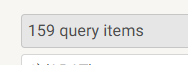

но буду брать tsv, потому что так повторяются графики с семинара

3821_BK

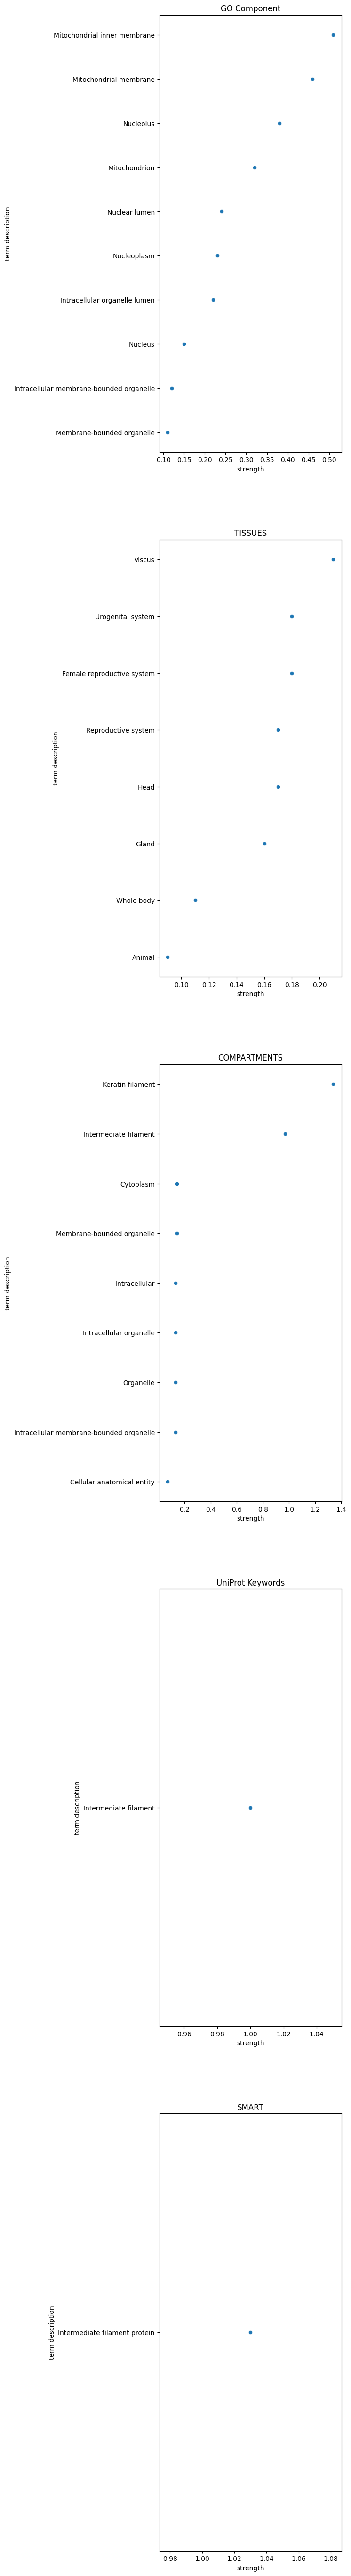

In [25]:
df = pd.read_csv('/home/aandreeva/hw/hw_17/enrichment.all (1).tsv', sep = '\t')
cats = df['#category'].unique()
f, ax = plt.subplots(len(cats), 1, figsize = (5, 70))
i = 0
for c in cats:
    tmp = df[df['#category'] == c]
    tmp = tmp.sort_values(by = 'strength', ascending = False)
    sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
    ax[i].set_title(c)
    i+=1

4114_AK

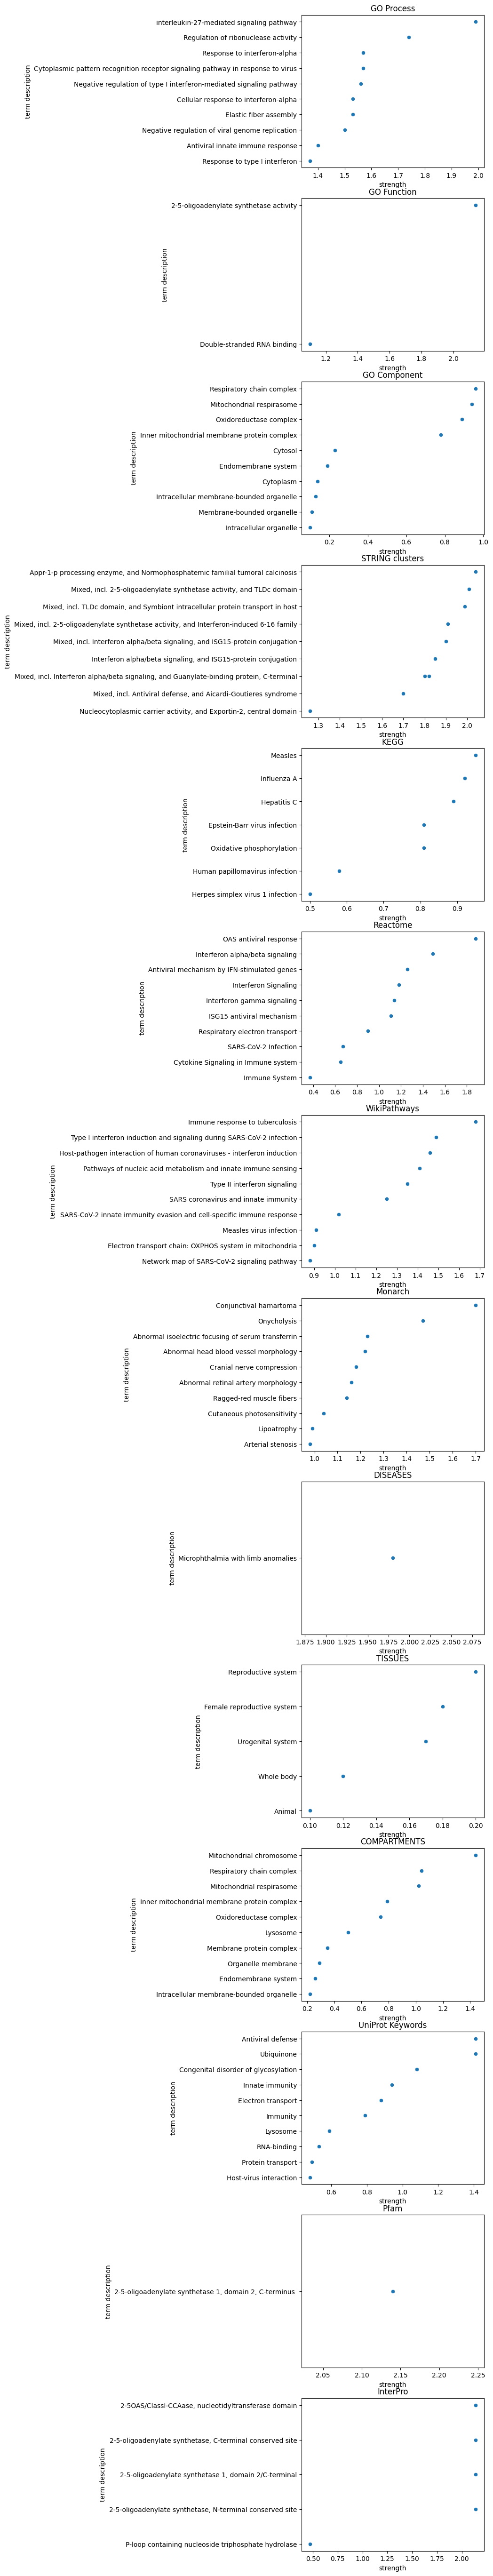

In [24]:
df = pd.read_csv('/home/aandreeva/hw/hw_17/enrichment.all_4144AK.tsv', sep = '\t')
cats = df['#category'].unique()
f, ax = plt.subplots(len(cats), 1, figsize = (5, 70))
i = 0
for c in cats:
    tmp = df[df['#category'] == c]
    tmp = tmp.sort_values(by = 'strength', ascending = False)
    sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
    ax[i].set_title(c)
    i+=1

4114_BK

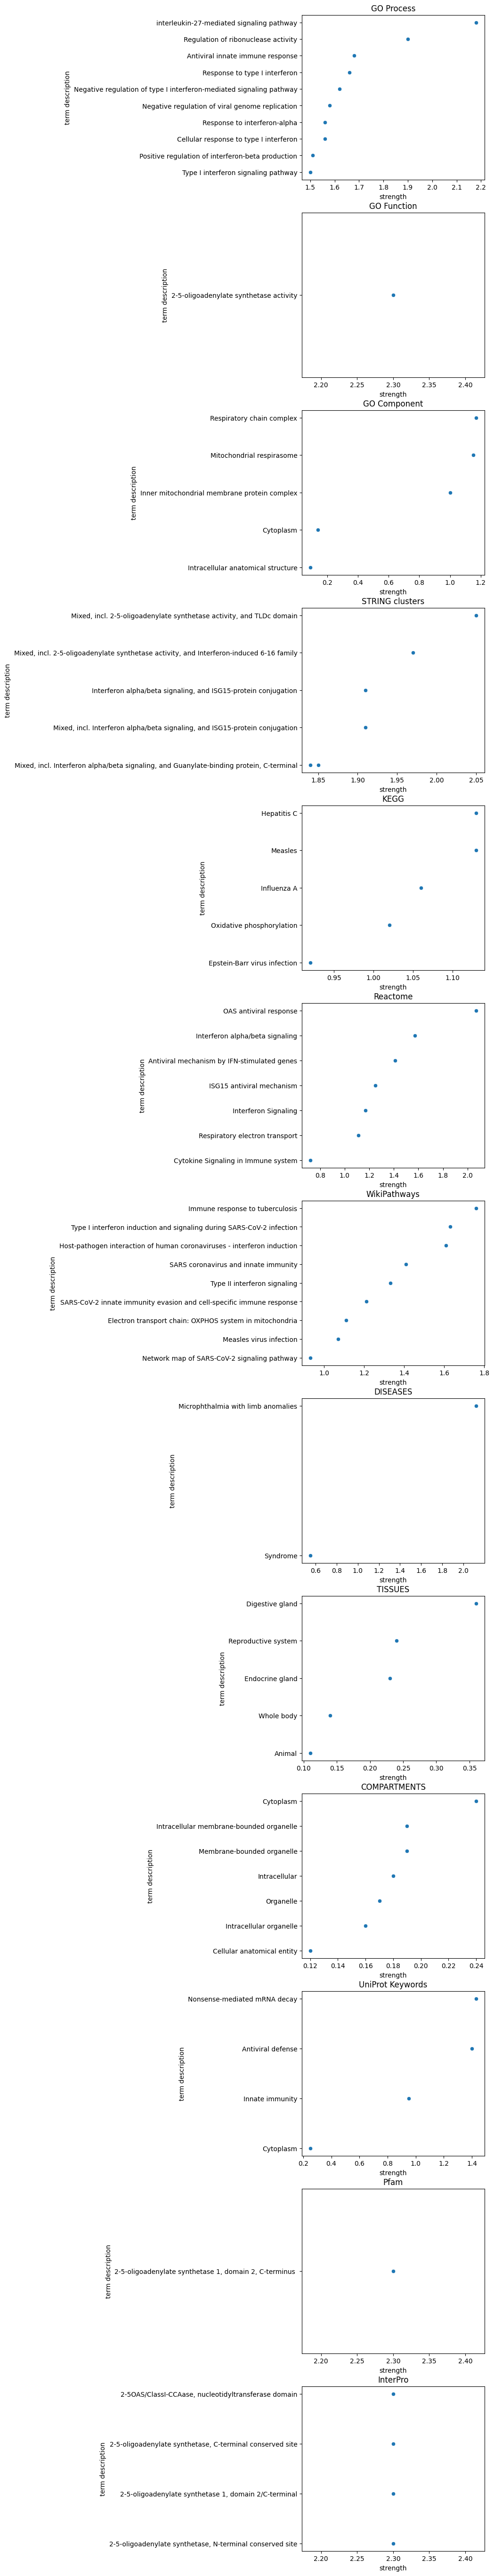

In [23]:
df = pd.read_csv('/home/aandreeva/hw/hw_17/enrichment.all_4114BK.tsv', sep = '\t')
cats = df['#category'].unique()
f, ax = plt.subplots(len(cats), 1, figsize = (5, 70))
i = 0
for c in cats:
    tmp = df[df['#category'] == c]
    tmp = tmp.sort_values(by = 'strength', ascending = False)
    sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
    ax[i].set_title(c)
    i+=1

6138_AK

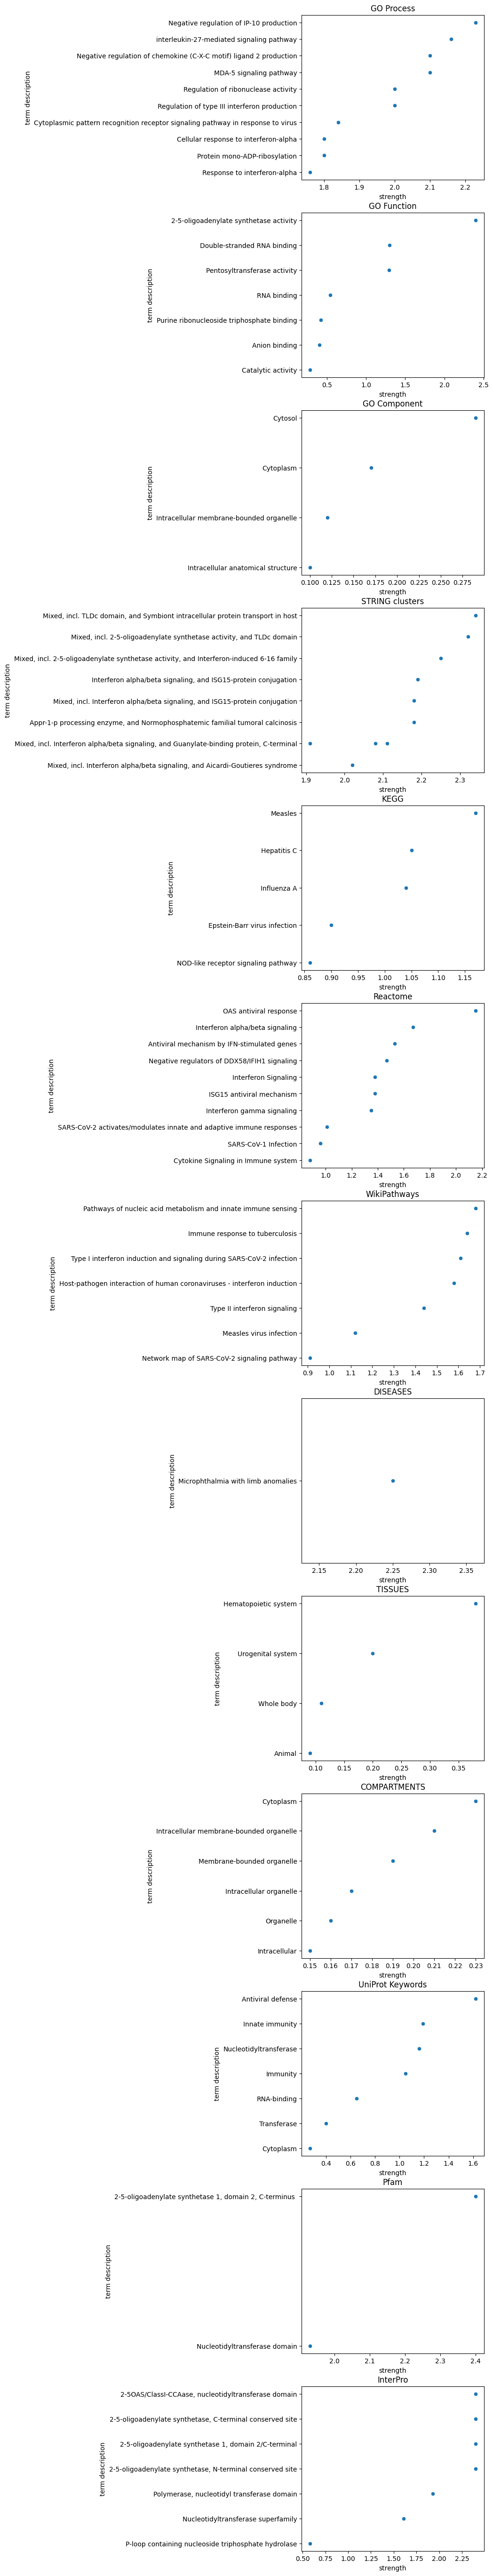

In [22]:
df = pd.read_csv('/home/aandreeva/hw/hw_17/enrichment.all_6138AK.tsv', sep = '\t')
cats = df['#category'].unique()
f, ax = plt.subplots(len(cats), 1, figsize = (5, 70))
i = 0
for c in cats:
    tmp = df[df['#category'] == c]
    tmp = tmp.sort_values(by = 'strength', ascending = False)
    sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
    ax[i].set_title(c)
    i+=1

6138_BK

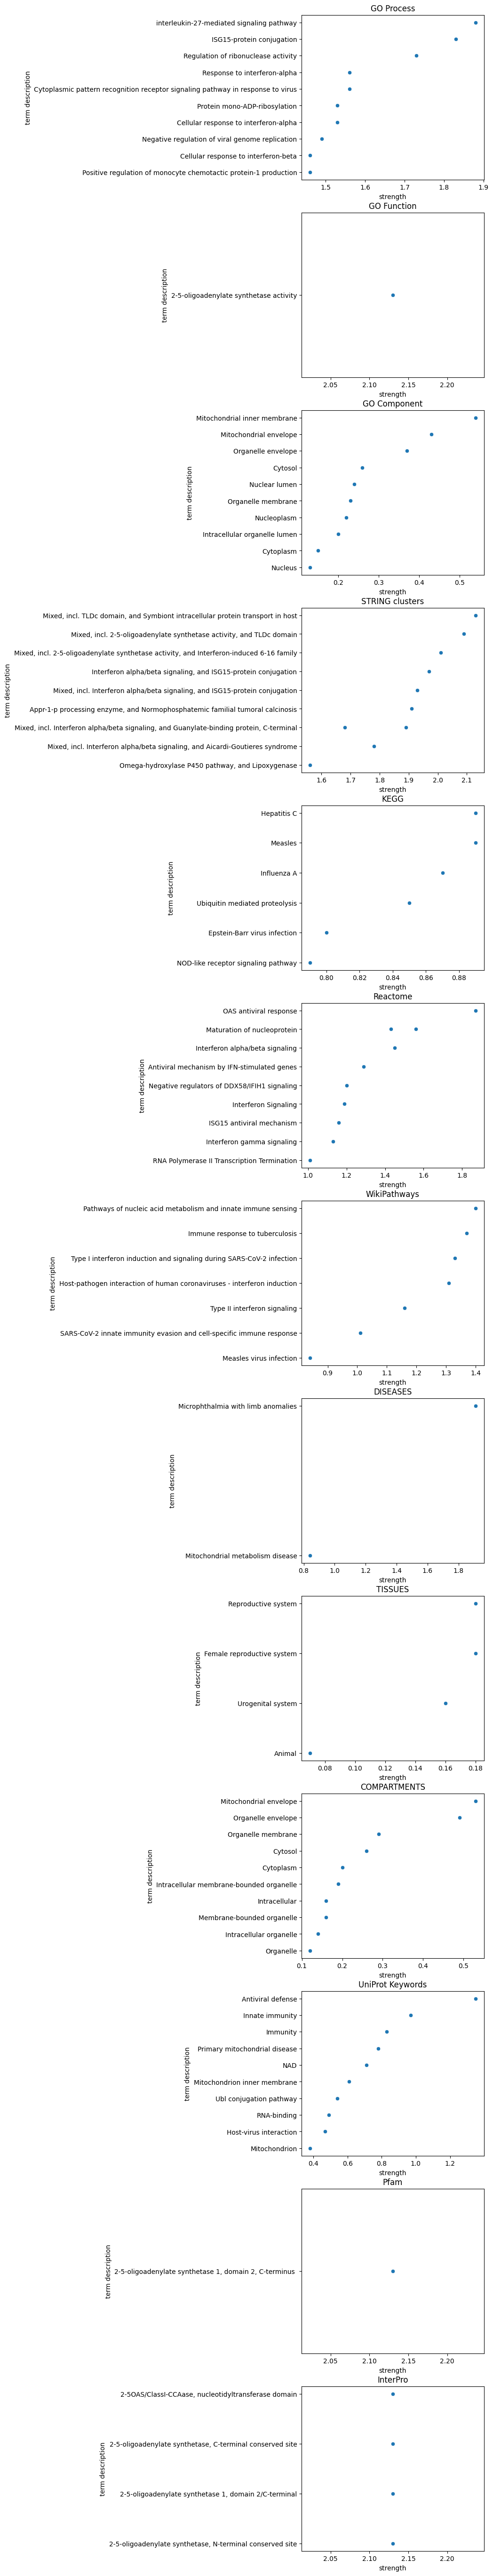

In [21]:
df = pd.read_csv('/home/aandreeva/hw/hw_17/enrichment.all (2).tsv', sep = '\t')
cats = df['#category'].unique()
f, ax = plt.subplots(len(cats), 1, figsize = (5, 70))
i = 0
for c in cats:
    tmp = df[df['#category'] == c]
    tmp = tmp.sort_values(by = 'strength', ascending = False)
    sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
    ax[i].set_title(c)
    i+=1

Выводы:
линия 4114 - сильный противовирусный ответ. сильная активация интерфероновых путей, особенно выражен ответ на интерферон-альфа, активность 2-5-олигоаденилатсинтетазы и система ISG15-конъюгации. в этой линии особенно активен интерлейкин-27 сигнальный путь, это может указывать на активацию как врождённого, так и адаптивного иммунитета.

линия 6138 показывает иммунный ответ с воспалительным компонентом.здесь сильно активированы хемокиновые пути. 

у линия 3821 наименее выраженный противовирусный статус с изменением метаболизма. в сравнении 3821B/K преобладают изменения митохондриальных белков и энергетического метаболизма, что может отражать адаптацию клеток к условиям опухолевого микроокружения.

Что касается различий в активации интерферонами, анализ показывает дифференциальную активацию различных типов интерферонового ответа. В линии 4114 преобладает ответ на интерферон-альфа (тип I интерферон), что характерно для острой противовирусной защиты. В линии 6138 наблюдается более сбалансированная активация с элементами ответа на интерферон-бета, а также регуляция типа III интерферона, что может указывать на более специализированную и локализованную противовирусную защиту. Различный паттерн активации интерфероновых путей может отражать разные механизмы взаимодействия опухолевых клеток с иммунной системой и различные стратегии выживания в условиях иммунного давления.

# Анализ метрик

      Sample  Line Treatment  Euclidean  Modified_Euclidean       pi1      pi2
0  3821_IFNA  3821      IFNA      5.609               3.268  2509.320  208.217
1  3821_IFNB  3821      IFNB      7.151               2.304  3054.104  200.909
2  4114_IFNA  4114      IFNA      9.151               6.217  3037.215  183.376
3  4114_IFNB  4114      IFNB      7.897               5.229  1389.156   91.175
4  6138_IFNA  6138      IFNA      4.726               1.951   822.798   75.644
5  6138_IFNB  6138      IFNB      5.056               1.810  1686.997  150.732


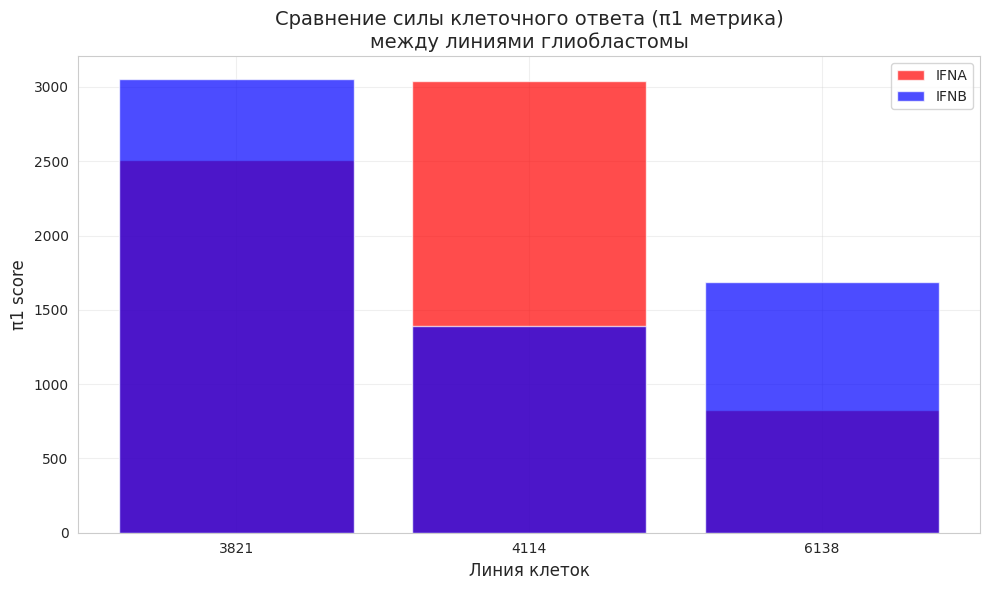

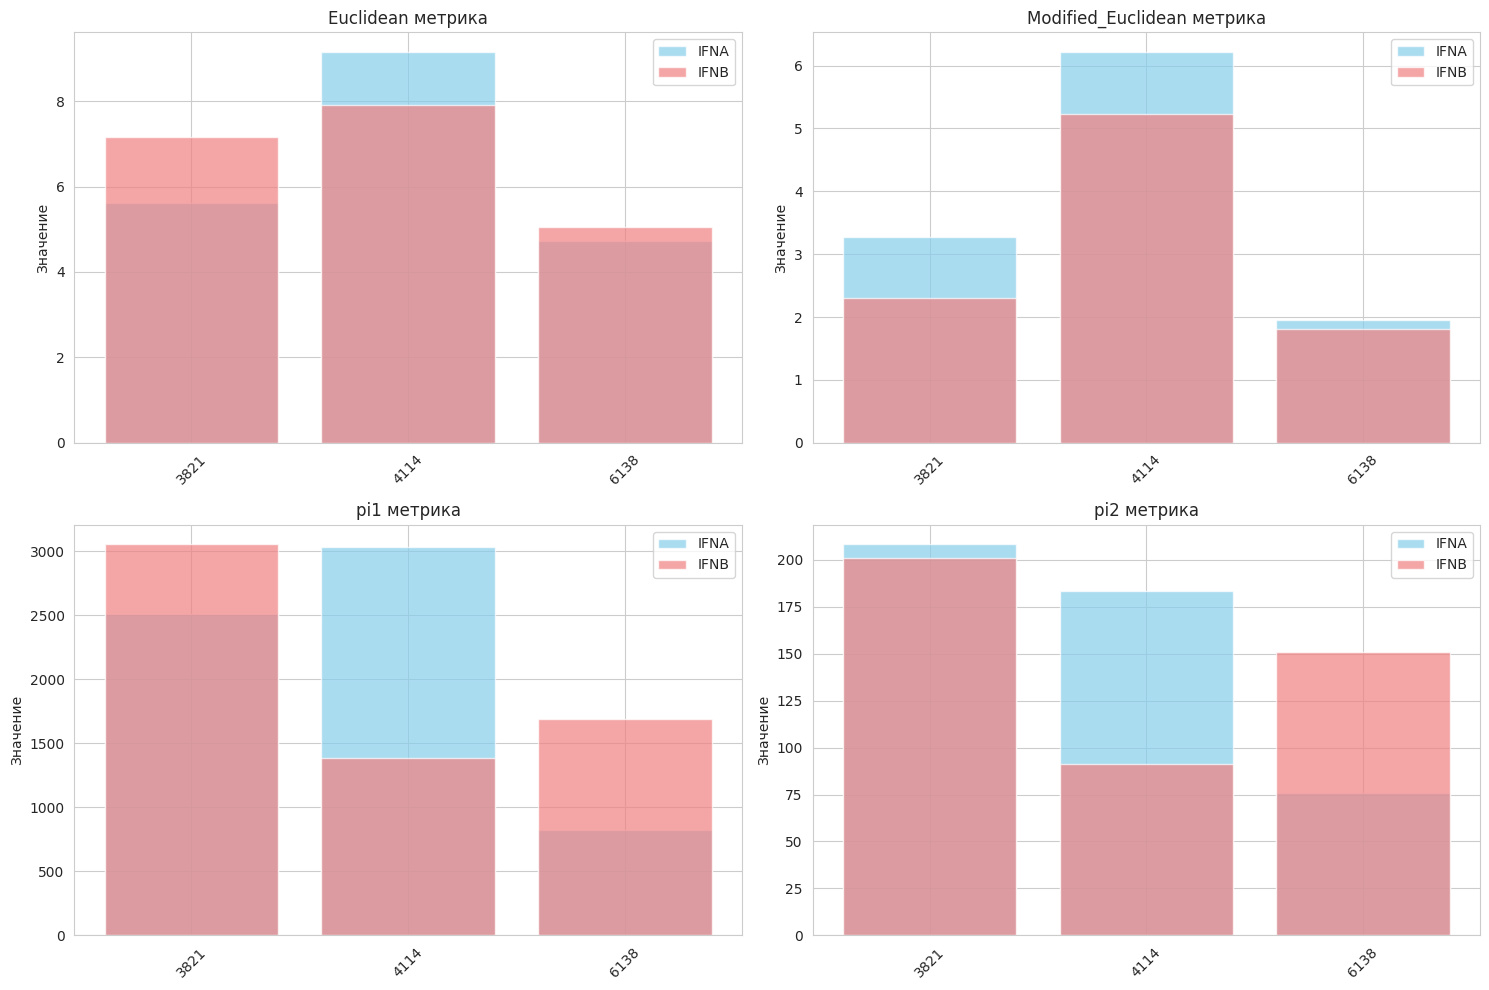

Максимальный ответ на IFNA: 4114_IFNA (π1 = 3037.22)
Максимальный ответ на IFNB: 3821_IFNB (π1 = 3054.10)

Самая чувствительная линия в целом: 3821_IFNB

Ранжирование линий по силе ответа (по π1):
1. 3821_IFNB: π1 = 3054.10
2. 4114_IFNA: π1 = 3037.22
3. 3821_IFNA: π1 = 2509.32
4. 6138_IFNB: π1 = 1687.00
5. 4114_IFNB: π1 = 1389.16
6. 6138_IFNA: π1 = 822.80


In [29]:
data_path = "/home/aandreeva/hw/hw_17/qreps"
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
lines = ['3821', '4114', '6138']
treatments = ['A', 'B']

all_metrics = {}

for line in lines:
    for treatment in treatments:
        filename = f"metrics_{line}{treatment}_{line}K.tsv"
        filepath = os.path.join(data_path, filename)
        if os.path.exists(filepath):
            df = pd.read_csv(filepath, sep='\t')
            all_metrics[f"{line}_IFN{treatment}"] = df
        else:
            print(f"Файл не найден: {filename}")

comparison_data = []

for name, df in all_metrics.items():
    if not df.empty:
        # Извлекаем значения метрик
        euclidean = df['Euclidean distance'].iloc[0] if 'Euclidean distance' in df.columns else 0
        mod_euclidean = df['Modified euclidean distance'].iloc[0] if 'Modified euclidean distance' in df.columns else 0
        pi1 = df['pi1'].iloc[0] if 'pi1' in df.columns else 0
        pi2 = df['pi2'].iloc[0] if 'pi2' in df.columns else 0
        
        comparison_data.append({
            'Sample': name,
            'Line': name.split('_')[0],
            'Treatment': name.split('_')[1],
            'Euclidean': euclidean,
            'Modified_Euclidean': mod_euclidean,
            'pi1': pi1,
            'pi2': pi2
        })

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.round(3))

plt.figure(figsize=(10, 6))
colors = {'IFNA': 'red', 'IFNB': 'blue'}

for treatment in ['IFNA', 'IFNB']:
    treatment_data = df_comparison[df_comparison['Treatment'] == treatment]
    plt.bar(treatment_data['Line'], treatment_data['pi1'], 
             label=treatment, alpha=0.7, color=colors[treatment])

plt.title('Сравнение силы клеточного ответа (π1 метрика)\nмежду линиями глиобластомы', fontsize=14)
plt.ylabel('π1 score', fontsize=12)
plt.xlabel('Линия клеток', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

metrics_to_plot = ['Euclidean', 'Modified_Euclidean', 'pi1', 'pi2']
colors = ['skyblue', 'lightcoral']

for i, metric in enumerate(metrics_to_plot):
    for j, treatment in enumerate(['IFNA', 'IFNB']):
        treatment_data = df_comparison[df_comparison['Treatment'] == treatment]
        axes[i].bar([f"{line}" for line in treatment_data['Line']], 
                   treatment_data[metric], 
                   color=colors[j], alpha=0.7, label=treatment)
    
    axes[i].set_title(f'{metric} метрика')
    axes[i].set_ylabel('Значение')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


for treatment in ['IFNA', 'IFNB']:
    treatment_data = df_comparison[df_comparison['Treatment'] == treatment]
    if not treatment_data.empty:
        max_pi1 = treatment_data.loc[treatment_data['pi1'].idxmax()]
        print(f"Максимальный ответ на {treatment}: {max_pi1['Sample']} (π1 = {max_pi1['pi1']:.2f})")

# Сравниваем общую силу ответа
df_comparison['Total_Response'] = df_comparison[['pi1', 'pi2']].mean(axis=1)
strongest_responder = df_comparison.loc[df_comparison['Total_Response'].idxmax()]
print(f"\nСамая чувствительная линия в целом: {strongest_responder['Sample']}")

print("\nРанжирование линий по силе ответа (по π1):")
ranked = df_comparison.sort_values('pi1', ascending=False)
for i, (_, row) in enumerate(ranked.iterrows(), 1):
    print(f"{i}. {row['Sample']}: π1 = {row['pi1']:.2f}")

π1-  суммарная сила клеточного ответа, учитывает количество значимых белков, их fold change и статистическую значимость
π2 - логарифм произведения.

3821 - самая чувствительная линия (самый сильный  ответ на IFN-B)
4114 - хороший ответ на IFN-A, но слабый на IFN-B
6138 - наименее чувствительная линия

Таким образом, мы можем предсказывать эффективность терапии интерферонами для разных линий глиобластомы и выбрать оптимальный тип интерферона для конкретной опухоли.